# Galaxy Photometry Demo


In [1]:
import astropy.units as u
import matplotlib.pyplot as plt

from castor_etc.telescope import Telescope
from castor_etc.background import Background
from castor_etc.sources import Profiles, ExtendedSource, PointSource, GalaxySource
from castor_etc.photometry import Photometry

from castor_etc import photometry as phot
import importlib
importlib.reload(phot)


<module 'castor_etc.photometry' from '/arc/home/IsaacCheng/CASTOR/ETC/castor_etc/photometry.py'>

In [2]:
MyTelescope = Telescope()
MyBackground = Background()
print(MyBackground.calc_mags_per_sq_arcsec(MyTelescope))

{'uv': 28.201743690413984, 'u': 24.241057364077655, 'g': 22.588133257221507}


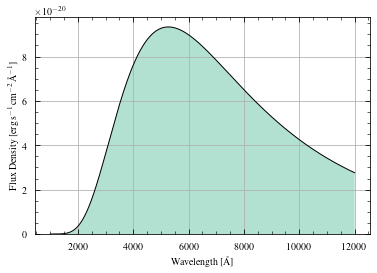

{'uv': 30.63931572381677, 'u': 27.999999999999993, 'g': 26.83213968202059}
27.092000681885416


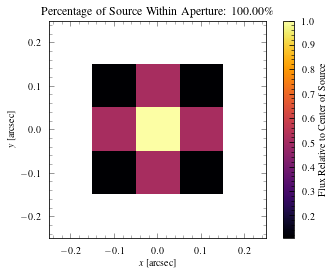

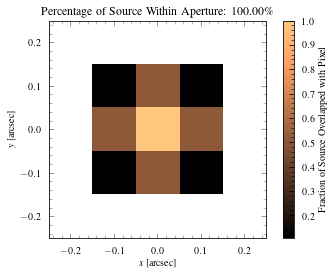

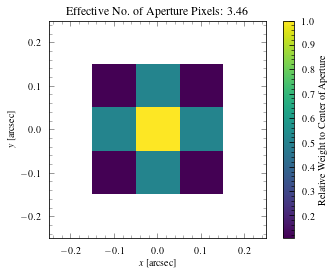

{'uv': 100844.77341174745, 'u': 2351.3165253211887, 'g': 526.9910502400985}


In [2]:
%matplotlib inline
importlib.reload(phot)
MyTelescope = Telescope(dark_current=0.01)

MyBackground = Background(mags_per_sq_arcsec={"uv": 26.08, "u": 23.74, "g": 22.60})
# MyBackground = Background()
# print(MyBackground.calc_mags_per_sq_arcsec(MyTelescope))

flux_profile = Profiles.uniform()
MySource = PointSource(flux_profile, angle=0.15 * u.arcsec)
MySource.generate_bb(5500)
MySource.norm_to_AB_mag(28.0, "u", MyTelescope)
# MySource.norm_to_AB_mag(27.9787, "u", MyTelescope)
# MySource.norm_to_AB_mag(18.141592654)
# MySource.norm_luminosity_dist(1, 10*u.kpc)
MySource.show_spectrum()

print(MySource.get_AB_mag(MyTelescope))
print(MySource.get_AB_mag())

MyPhot = phot.Photometry(MyTelescope, MySource, MyBackground)
MyPhot.use_optimal_aperture()
# MyPhot.use_optimal_aperture(center=[0.1, 0.0] << u.arcsec)
MyPhot.show_source_weights()
MyPhot.show_source_aper_overlap()
MyPhot.show_aper_weights()
time = MyPhot.calc_snr_or_t(snr=5, reddening=0, quiet=True, include_redleak=True)
print(time)

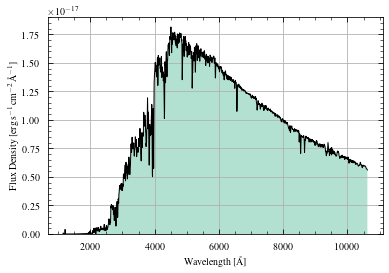

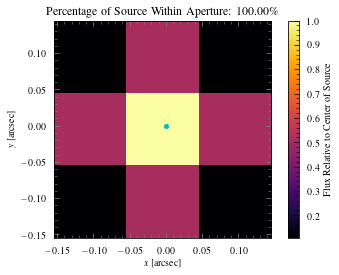

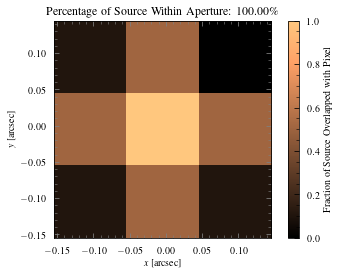

/tmp/ipykernel_20978/2042348206.py:29: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(img)


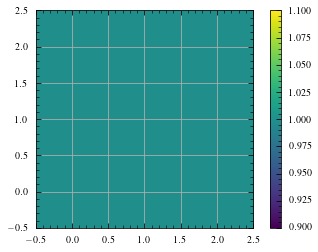

Time (s) required to reach SNR=100 in uv-band 31498.827295982017
SNR achieved in t=31498.827295982017 seconds in uv-band 100.0

Time (s) required to reach SNR=100 in u-band 951.4464733543911
SNR achieved in t=951.4464733543911 seconds in u-band 100.0

Time (s) required to reach SNR=100 in g-band 193.72460414054726
SNR achieved in t=193.72460414054726 seconds in g-band 100.00000000000001



In [7]:
importlib.reload(phot)
# %matplotlib widget
#
# Define telescope instance
#
MyTelescope = Telescope()
#
# Generate background object
#
MyBackground = Background(mags_per_sq_arcsec={"uv": 26.08, "u": 23.74, "g": 22.60})
MyBackground.add_geocoronal_emission(flux="avg")
#
# Create source
#
flux_profile = Profiles.uniform()
MySource = PointSource(flux_profile, angle=0.15 * u.arcsec)  # set to FWHM if point source
# MySource.use_pickles_spectrum("o9v")
MySource.use_pickles_spectrum("g2v")
MySource.norm_to_value(26, "mag", passband="uv", telescopeObj=MyTelescope)
MySource.show_spectrum()

MyPhot = phot.Photometry(MyTelescope, MySource, MyBackground)
MyPhot.use_optimal_aperture()
MyPhot.show_source_weights(mark_source=True)
MyPhot.show_source_aper_overlap()

fig, ax = plt.subplots()
img = ax.imshow(MyPhot.redleak_weights, origin="lower")
fig.colorbar(img)
plt.show()

TARGET_SNR = 100

# (By default, returns a dictionary with the passbands as the keys)
# times = MyPhot.calc_snr_or_t(snr=TARGET_SNR)
# print(f"Time (s) required to reach SNR={TARGET_SNR} in each passband:", times)

# (For prettier printing)
for band in MyTelescope.passbands:
    time = MyPhot.calc_snr_or_t(snr=TARGET_SNR, reddening=0, quiet=True)[band]
    print(f"Time (s) required to reach SNR={TARGET_SNR} in {band}-band", time)
    snr = MyPhot.calc_snr_or_t(t=time, reddening=0, quiet=True)[band]
    print(f"SNR achieved in t={time} seconds in {band}-band", snr)
    print()

Source AB mags {'uv': 18.838903364745583, 'u': 17.965353701283554, 'g': 16.693436264225703}
Source bolometric AB mag 16.539338823566105


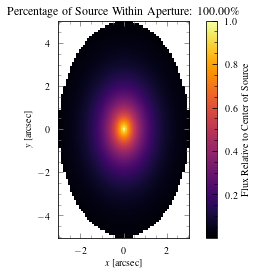

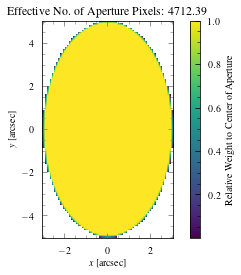

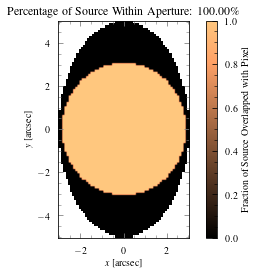

Time (s) required to reach SNR=10 in uv-band 82.31302152121764
SNR achieved in t=82.31302152121764 seconds in uv-band 10.000000000000002

Time (s) required to reach SNR=10 in u-band 34.89447717349722
SNR achieved in t=34.89447717349722 seconds in u-band 10.0

Time (s) required to reach SNR=10 in g-band 8.385164522797819
SNR achieved in t=8.385164522797819 seconds in g-band 9.999999999999996



In [3]:
importlib.reload(phot)
# %matplotlib widget
import matplotlib as mpl
#
# Define telescope instance
#
MyTelescope = Telescope(passband_resolution=1 << u.AA)
#
# Generate background object
#
MyBackground = Background(mags_per_sq_arcsec={"uv": 26.08, "u": 23.74, "g": 22.60})
MyBackground.add_geocoronal_emission(flux="avg")
#
# Create source
#
# flux_profile = Profiles.sersic(r_eff=2 * u.arcsec, n=1, e=0.4, angle=0)
MySource = GalaxySource(r_eff=2*u.arcsec, n=1, angle_a=3 * u.arcsec, angle_b=2.8 * u.arcsec, rotation=90)
# MySource = GalaxySource(r_eff=2*u.arcsec, n=1, angle_a=2 * u.arcsec, angle_b=1.8 * u.arcsec, rotation=90)
#
# Renormalize & apply redshift
#
MySource.use_galaxy_spectrum(gal_type="spiral")
MySource.norm_luminosity_dist(luminosity=1.4e9, dist=58.3 * u.Mpc)  # (solar luminosities)
MySource.redshift_wavelengths(0.06)
print("Source AB mags", MySource.get_AB_mag(MyTelescope))
print("Source bolometric AB mag", MySource.get_AB_mag())
#
# Specify photometry aperture
#
MyPhot = phot.Photometry(MyTelescope, MySource, MyBackground)
MyPhot.use_elliptical_aperture(
    # a=2 * u.arcsec, b=2 * u.arcsec, center=[-2, -2] * u.arcsec, rotation=90
    a=3 * u.arcsec, b=5 * u.arcsec, center=[0, 0] * u.arcsec, rotation=0
    # a=2 * u.arcsec, b=1 * u.arcsec, center=[-2, -1] * u.arcsec, rotation=0
)
# MyPhot.use_rectangular_aperture(width=2.12 * u.arcsec, length=1.8 * u.arcsec, center=[0, 0] * u.arcsec)
#
# Visualize aperture
#
# MyPhot.show_source_weights(mark_source=False, norm=mpl.colors.LogNorm())
MyPhot.show_source_weights(mark_source=False)
MyPhot.show_aper_weights(plot=True)
MyPhot.show_source_aper_overlap()

TARGET_SNR = 10
REDDENING = 0.01

# (For prettier printing)
for band in MyTelescope.passbands:
    time = MyPhot.calc_snr_or_t(snr=TARGET_SNR, reddening=REDDENING)[band]
    print(f"Time (s) required to reach SNR={TARGET_SNR} in {band}-band", time)
    snr = MyPhot.calc_snr_or_t(t=time, reddening=REDDENING)[band]
    print(f"SNR achieved in t={time} seconds in {band}-band", snr)
    print()


In [9]:
TARGET_SNR = 100
REDENNING = 0.01

# (By default, returns a dictionary with the passbands as the keys)
# times = MyPhot.calc_snr_or_t(snr=TARGET_SNR)
# print(f"Time (s) required to reach SNR={TARGET_SNR} in each passband:", times)

# (For prettier printing)
for band in MyTelescope.passbands:
    time = MyPhot.calc_snr_or_t(snr=TARGET_SNR, reddening=REDENNING)[band]
    print(f"Time (s) required to reach SNR={TARGET_SNR} in {band}-band", time)
    snr = MyPhot.calc_snr_or_t(t=time, reddening=REDENNING)[band]
    print(f"SNR achieved in t={time} seconds in {band}-band", snr)
    print()


Time (s) required to reach SNR=100 in uv-band 315.90664727602956
SNR achieved in t=315.90664727602956 seconds in uv-band 100.0

Time (s) required to reach SNR=100 in u-band 132.90136849058652
SNR achieved in t=132.90136849058652 seconds in u-band 100.0

Time (s) required to reach SNR=100 in g-band 31.907992064201952
SNR achieved in t=31.907992064201952 seconds in g-band 100.0



half_x, half_y, center:  1.1 0.9 [0. 0.]
center_px [11.0, 9.0]
num_px_offset_x, num_px_offset_y 0.0 0.0
source_center_px: [11.0, 9.0]


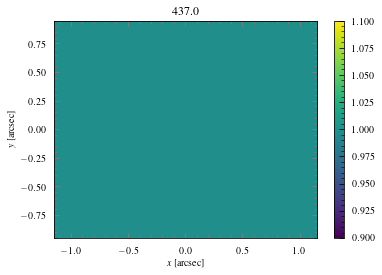

/arc/home/IsaacCheng/CASTOR/ETC/castor_etc/photometry.py:1203: RuntimeWarning: Effective aperture area is off by more than 0.1 pixels... Contact the developer with a minimal working example please. Thanks!
  if isinstance(self.SourceObj, PointSource):


eff_npix, exact_npix 381.375 381.59999999999997


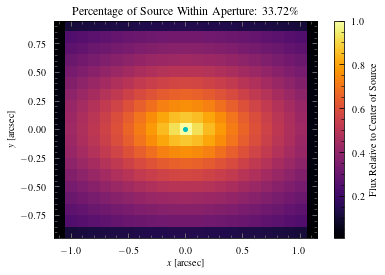

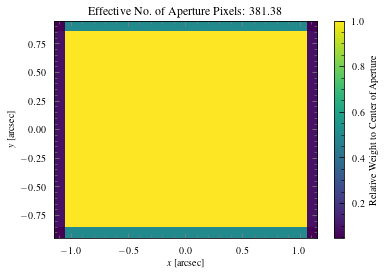

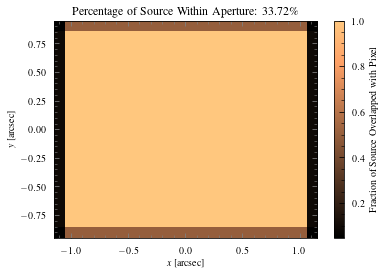

/tmp/ipykernel_20978/3320779851.py:39: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(img)


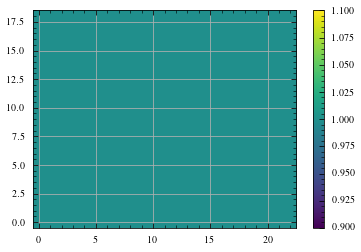

In [57]:
importlib.reload(phot)
#
# Define telescope instance
#
MyTelescope = Telescope(passband_resolution=1 << u.AA)
#
# Generate background object
#
MyBackground = Background(mags_per_sq_arcsec={"uv": 26.08, "u": 23.74, "g": 22.60})
MyBackground.add_geocoronal_emission(flux="avg")
#
# Create source
#
flux_profile = Profiles.sersic(r_eff=2 * u.arcsec, n=1, e=0.4, angle=0)
MySource = ExtendedSource(flux_profile, angle_a=2 * u.arcsec, angle_b=1.8 * u.arcsec)
#
# Renormalize & apply redshift
#
MySource.use_galaxy_spectrum(gal_type="spiral")
MySource.norm_luminosity_dist(luminosity=1.4e9, dist=58.3 * u.Mpc)  # (solar luminosities)
MySource.redshift_wavelengths(0.06)
#
# Specify photometry aperture
#
MyPhot = phot.Photometry(MyTelescope, MySource, MyBackground)
# MyPhot.use_elliptical_aperture(
#     a=2 * u.arcsec, b=1 * u.arcsec, center=[-0.5, 1] * u.arcsec, rotation=22020
# )
MyPhot.use_rectangular_aperture(width=2.12 * u.arcsec, length=1.8 * u.arcsec, center=[0, 0] * u.arcsec)
#
# Visualize aperture
#
MyPhot.show_source_weights(mark_source=True)
MyPhot.show_aper_weights()
MyPhot.show_source_aper_overlap()

fig, ax = plt.subplots()
img = ax.imshow(MyPhot.redleak_weights, origin="lower")
fig.colorbar(img)
plt.show()



In [4]:
TARGET_SNR = 100
REDENNING = 0.01

# (By default, returns a dictionary with the passbands as the keys)
# times = MyPhot.calc_snr_or_t(snr=TARGET_SNR)
# print(f"Time (s) required to reach SNR={TARGET_SNR} in each passband:", times)

# (For prettier printing)
for band in MyTelescope.passbands:
    time = MyPhot.calc_snr_or_t(snr=TARGET_SNR, reddening=REDENNING)[band]
    print(f"Time (s) required to reach SNR={TARGET_SNR} in {band}-band", time)
    snr = MyPhot.calc_snr_or_t(t=time, reddening=REDENNING)[band]
    print(f"SNR achieved in t={time} seconds in {band}-band", snr)
    print()


Time (s) required to reach SNR=100 in uv-band 319.9745036071553
SNR achieved in t=319.9745036071553 seconds in uv-band 100.0

Time (s) required to reach SNR=100 in u-band 138.84664205453203
SNR achieved in t=138.84664205453203 seconds in u-band 100.0

Time (s) required to reach SNR=100 in g-band 34.78261038472111
SNR achieved in t=34.78261038472111 seconds in g-band 100.0

